# **Kaggle Dataset link** - 'https://www.kaggle.com/datasets/andrewmvd/car-plate-detection'

# **Install Dependencies**

In [1]:
!pip install -q supervision ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.4/217.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 30.0 MB/s eta 0:00:0000:01


# **Import Modules**

In [2]:
# Import Modules

import supervision as sv
from ultralytics import YOLO 
import pandas as pd 
import matplotlib.pyplot as plt 

import os 
import shutil 
import random 
import cv2

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# **Load The Dataset**

In [8]:
IMG_DIR = '/kaggle/input/car-plate-detection/images'
ANN_DIR = '/kaggle/input/car-plate-detection/annotations'
FINAL_DIR = '/kaggle/working/CarDataset'

# Remove old directory 

if os.path.exists(FINAL_DIR):
    shutil.rmtree(FINAL_DIR)

os.makedirs(FINAL_DIR, exist_ok= True)

In [9]:
# Load Pascal VOC XML 

dataset = sv.DetectionDataset.from_pascal_voc(
    images_directory_path= IMG_DIR, 
    annotations_directory_path= ANN_DIR
)

print(f'Total Images', len(dataset))

Total Images 433


# **Data Preprocessing**

In [10]:
# Split Dataset (80/10/10)

train_dataset, remaining_dataset = dataset.split(split_ratio=0.8)
valid_dataset, test_dataset = remaining_dataset.split(split_ratio=0.5)

print('Train', len(train_dataset))
print('Valid', len(valid_dataset))
print('Test', len(test_dataset))

Train 346
Valid 43
Test 44


In [11]:
# Export To Yolo Format 

train_dataset.as_yolo(
    images_directory_path=os.path.join(FINAL_DIR, 'train/images'), 
    annotations_directory_path=os.path.join(FINAL_DIR, 'train/labels')
)

valid_dataset.as_yolo(
    images_directory_path=os.path.join(FINAL_DIR, 'valid/images'), 
    annotations_directory_path=os.path.join(FINAL_DIR, 'valid/labels')
)

test_dataset.as_yolo(
    images_directory_path=os.path.join(FINAL_DIR, 'test/images'), 
    annotations_directory_path=os.path.join(FINAL_DIR, 'test/labels'),
    data_yaml_path=os.path.join(FINAL_DIR, 'data.yaml')
)

print("YOLO export done!")

YOLO export done!


In [18]:
import yaml

# Fix / Overwrite data.yaml File (For YOLOv8)

DATA_YAML_PATH = os.path.join(FINAL_DIR, 'data.yaml')

data = {
    'path': FINAL_DIR,
    'train': 'train/images',
    'val': 'valid/images',
    'test' : 'test/images',
    'nc' : 1,
    'names': ['licence']
}

with open(DATA_YAML_PATH, 'w') as f:
    yaml.dump(data, f)

print('\n data.yaml created at:', DATA_YAML_PATH)

print(f'\n Final YOLO Dataset Ready AT: {FINAL_DIR}')


 data.yaml created at: /kaggle/working/CarDataset/data.yaml

 Final YOLO Dataset Ready AT: /kaggle/working/CarDataset


In [19]:
import glob

for split in ['train', 'valid', 'test']:
    img_count = len(glob.glob(os.path.join(FINAL_DIR, split, 'images', '*.*')))
    lbl_count = len(glob.glob(os.path.join(FINAL_DIR, split, 'labels', '*.txt')))
    print(f"{split.upper()} -> Images: {img_count} | Labels: {lbl_count}")

TRAIN -> Images: 346 | Labels: 346
VALID -> Images: 43 | Labels: 43
TEST -> Images: 44 | Labels: 44


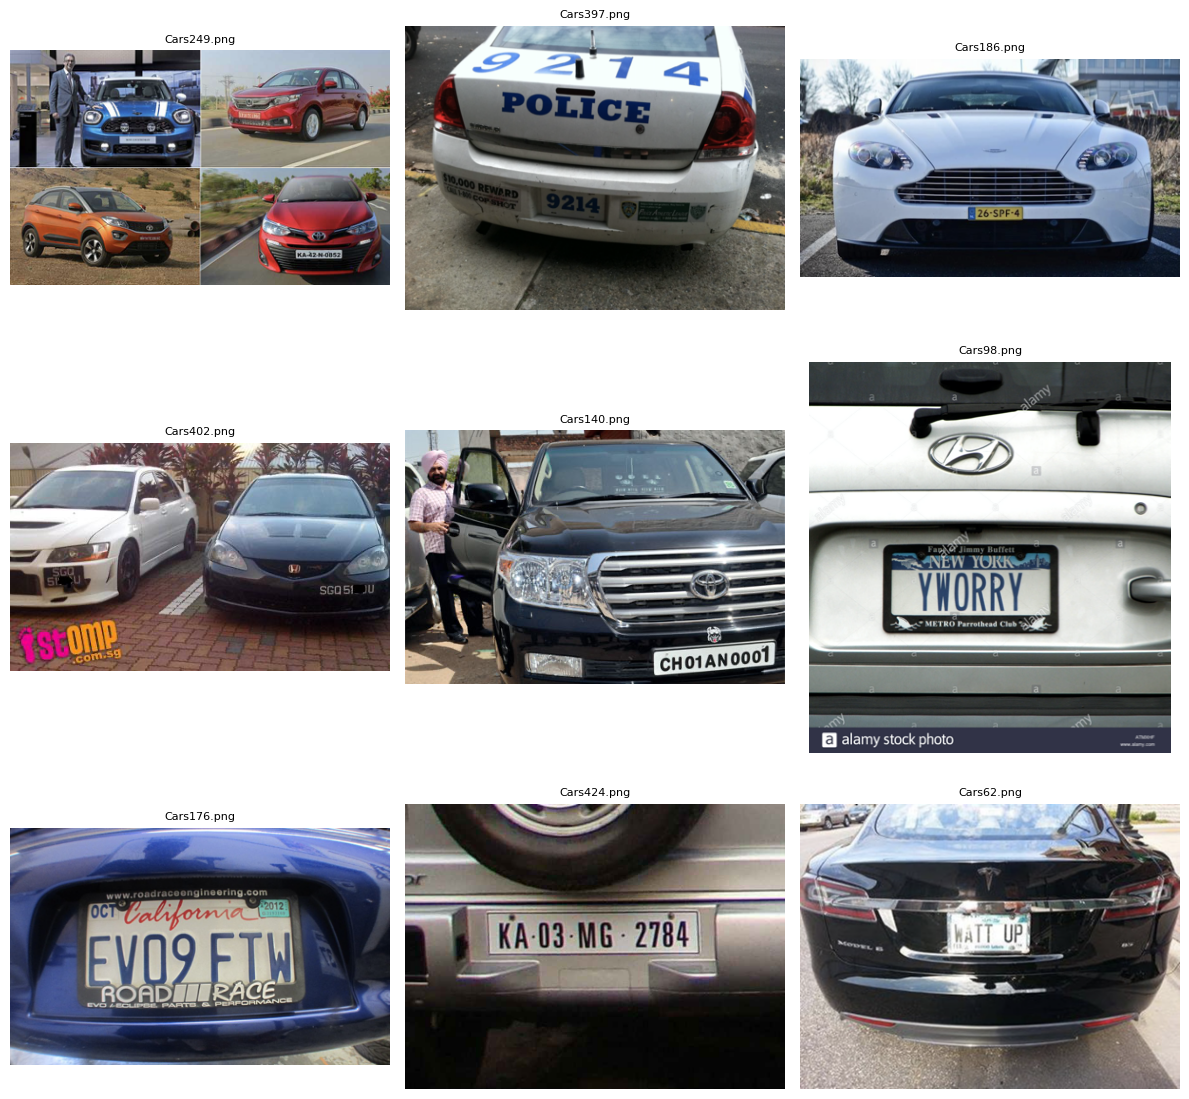

In [20]:
# Visualize Random Test Images 

TRAIN_IMG_DIR = f'{FINAL_DIR}/train/images'

train_images = os.listdir(TRAIN_IMG_DIR)
sample_images = random.sample(train_images, 9)

plt.figure(figsize=(12, 12))

for i, image_name in enumerate(sample_images):
    image_path = os.path.join(TRAIN_IMG_DIR, image_name)

    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title(image_name, fontsize = 8)
    plt.axis('off')

plt.tight_layout()
plt.show()

# **Model Building**

In [24]:
# Load The Yolo Model 

model = YOLO('yolov8n.pt')

In [25]:
# Train the YOLO Model 

model.train(
    data = DATA_YAML_PATH,
    epochs = 100, 
    batch = 16,
    imgsz = 640,
    name = 'train',
    cache=True,
    exist_ok = True
)

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/CarDataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspe

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7958d81c3800>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [26]:
# Check the results 

results_csv = '/kaggle/working/runs/detect/train/results.csv'
df = pd.read_csv(results_csv)

df.head()

epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   4.11469         1.54760         3.14232         1.37126   
1      2   7.98336         1.51598         1.98118         1.30136   
2      3  11.83640         1.48707         1.84223         1.28634   
3      4  15.69130         1.57943         1.84763         1.31126   
4      5  19.50900         1.56680         1.71045         1.37296   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.00302            0.86667           0.32460   
1               0.34936            0.04818           0.10626   
2               0.41738            0.38216           0.32953   
3               0.29726            0.24444           0.15512   
4               0.28621            0.50793           0.26191   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.17833       1.25260       3.62662       1.16933  0.000420   
1              0.04084       1.30676       3.85946       1.29033  0.000851   
2              0.16582       1.50900       3.00781       1.34745  0.001274   
3              0.07399       1.55049       2.84836       1.50981  0.001688   
4              0.14727       1.47236       4.78761       1.38445  0.001921   

     lr/pg1    lr/pg2  
0  0.000420  0.000420  
1  0.000851  0.000851  
2  0.001274  0.001274  
3  0.001688  0.001688  
4  0.001921  0.001921

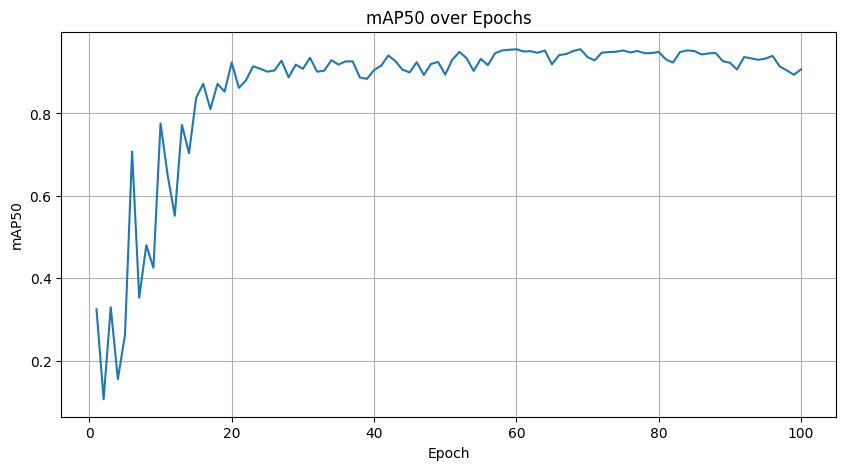

In [27]:
# PLOT TRAINING GRAPH (mAP50 over Epochs)

plt.figure(figsize=(10, 5))
plt.plot(df["epoch"], df["metrics/mAP50(B)"])
plt.title("mAP50 over Epochs")
plt.xlabel("Epoch")
plt.ylabel("mAP50")
plt.grid(True)
plt.show()

# **Model Evaluation**

In [29]:
# Load Best Model

BEST_MODEL_PATH = '/kaggle/working/runs/detect/train/weights/best.pt'
best_model = YOLO(BEST_MODEL_PATH)

# Evaluate On Test Dataset (After Prediction)

best_model.val(
    data = DATA_YAML_PATH,
    split = 'test'
)

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 14913MiB)
Model summary (fused): 73 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3362.0±1564.5 MB/s, size: 367.0 KB)
val: Scanning /kaggle/working/CarDataset/test/labels... 44 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 44/44 599.3it/s 0.1s
val: New cache created: /kaggle/working/CarDataset/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 2.7it/s 1.1s0.7s
                   all         44         45      0.895      0.946      0.967      0.637
Speed: 3.4ms preprocess, 8.1ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to /kaggle/working/runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7958b77ea570>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

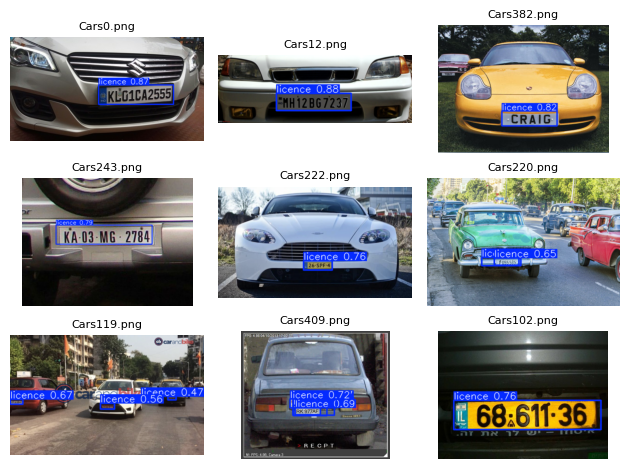

In [30]:
# VISUALIZE RANDOM TEST PREDICTIONS (AFTER TRAINING) - > Plot using yolo's result function

TEST_IMG_DIR = f'{FINAL_DIR}/test/images'

test_images = os.listdir(TEST_IMG_DIR)

sample_test_images = random.sample(test_images, 9)

for i, image_name in enumerate(sample_test_images):
    image_path = os.path.join(TEST_IMG_DIR, image_name)

    results = model.predict(image_path, conf=0.4, imgsz=640, verbose=False)[0]

    annotated_image = results.plot()

    annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

    plt.subplot(3, 3, i+1)
    plt.imshow(annotated_image)
    plt.title(image_name, fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()

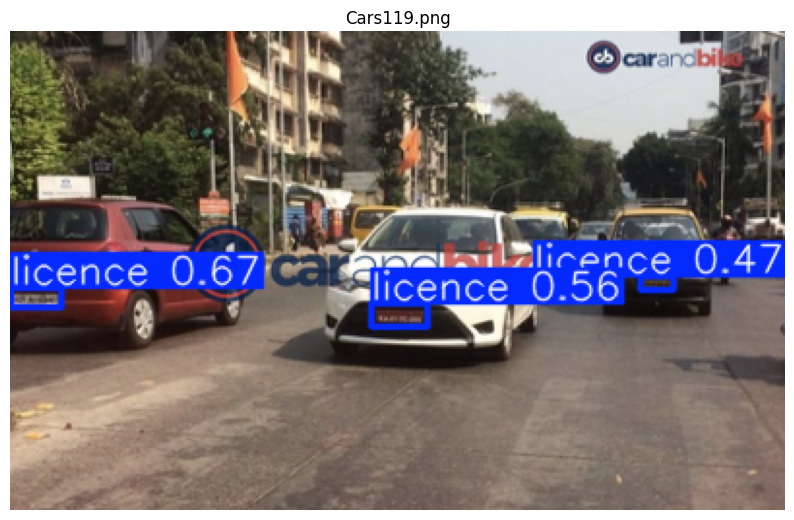

In [39]:
# Single Image


# ==============================
# SINGLE IMAGE PATH
# ==============================
image_path = f"{FINAL_DIR}/test/images/Cars119.png"   # <-- change image name
image_name = os.path.basename(image_path)

# ==============================
# YOLO PREDICTION
# ==============================
results = model.predict(image_path, conf=0.4, imgsz=640, verbose=False)[0]

# ==============================
# PLOT YOLO RESULT
# ==============================
annotated_image = results.plot()

# Convert BGR to RGB for matplotlib
annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

# ==============================
# SHOW IMAGE
# ==============================
plt.figure(figsize=(10, 7))
plt.imshow(annotated_image)
plt.title(image_name, fontsize=12)
plt.axis("off")
plt.show()


# **Extract License Plate Number Using Easy OCR**

In [35]:
import easyocr

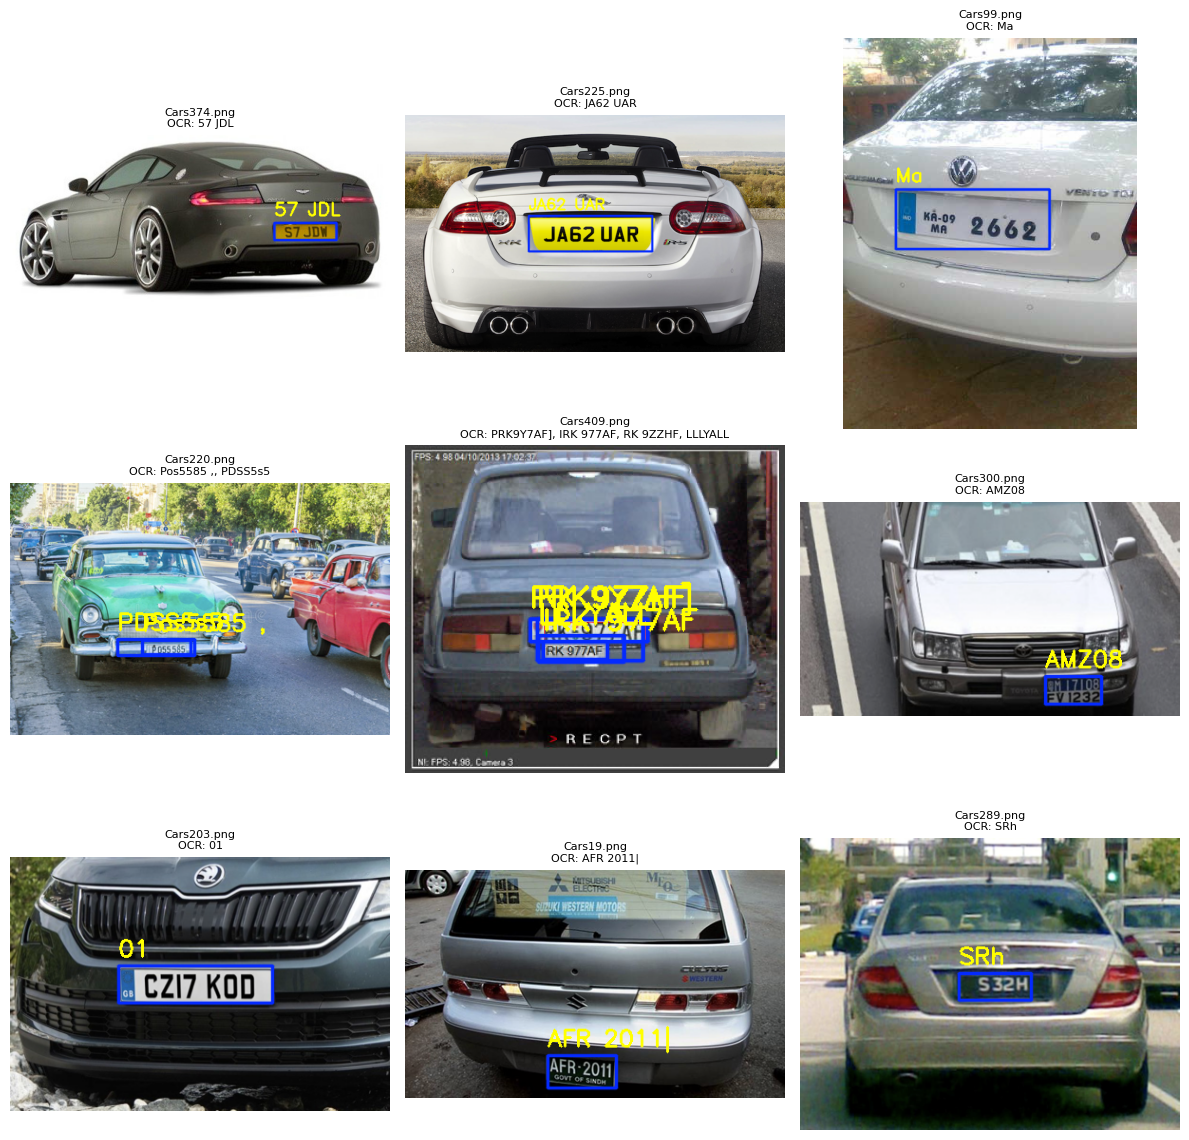

In [34]:
# ==============================
# LOAD EASYOCR
# ==============================
reader = easyocr.Reader(["en"], gpu=True)  # gpu=False if no GPU

# ==============================
# VISUALIZE RANDOM TEST PREDICTIONS + OCR
# ==============================
TEST_IMG_DIR = f"{FINAL_DIR}/test/images"
test_images = os.listdir(TEST_IMG_DIR)

sample_test_images = random.sample(test_images, 9)

plt.figure(figsize=(12, 12))

for i, image_name in enumerate(sample_test_images):
    image_path = os.path.join(TEST_IMG_DIR, image_name)

    img = cv2.imread(image_path) # Needed only for ocr

    # YOLO prediction
    results = model.predict(img, conf=0.4, imgsz=640, verbose=False)[0]

    # YOLO annotated image
    annotated_image = results.plot(conf=False, labels=False)

    plate_texts = []   # store all detected plate texts

    # OCR from each detected plate
    for box in results.boxes:
        x1, y1, x2, y2 = box.xyxy[0]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        roi = img[y1:y2, x1:x2]
        if roi.size == 0:
            continue

        gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        gray = cv2.resize(gray, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
        _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        ocr_result = reader.readtext(thresh)

        if len(ocr_result) > 0:
            text = ocr_result[0][1]
            plate_texts.append(text)

            # Put OCR text above bbox
            cv2.putText(
                annotated_image,
                text,
                (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.8,
                (0, 255, 255),
                2
            )

    # Convert BGR to RGB for matplotlib
    annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

    # Combine texts for title
    if len(plate_texts) > 0:
        title_text = f"{image_name}\nOCR: {', '.join(plate_texts)}"
    else:
        title_text = f"{image_name}\nOCR: Not Found"

    plt.subplot(3, 3, i + 1)
    plt.imshow(annotated_image)
    plt.title(title_text, fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.show()

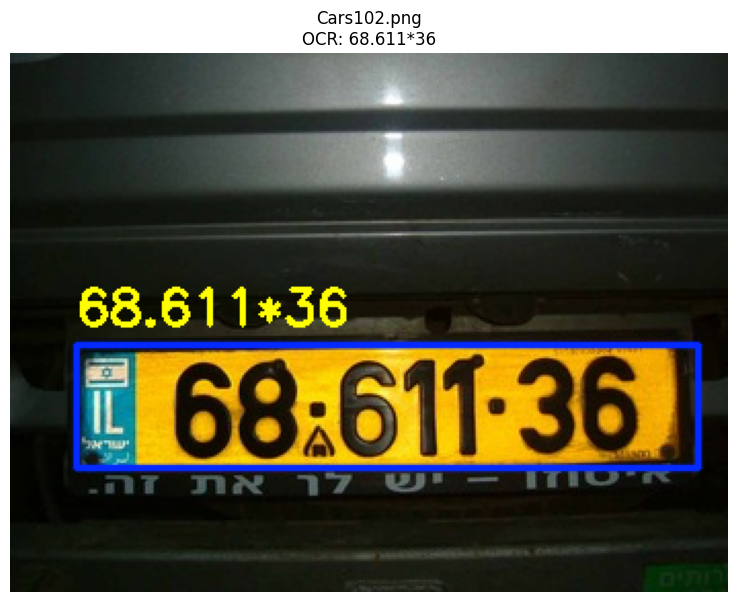

✅ Detected Text: ['68.611*36']


In [38]:
# For Single image detection

import os
import cv2
import easyocr
import matplotlib.pyplot as plt

# ==============================
# LOAD EASYOCR
# ==============================
reader = easyocr.Reader(["en"], gpu=True)   # gpu=False if no GPU

# ==============================
# SINGLE IMAGE PATH
# ==============================
image_path = f"{FINAL_DIR}/test/images/Cars102.png"   # <-- change image name
image_name = os.path.basename(image_path)

# ==============================
# READ IMAGE
# ==============================
img = cv2.imread(image_path)

if img is None:
    print("❌ Image not found:", image_path)

else:
    # ==============================
    # YOLO PREDICTION
    # ==============================
    results = model.predict(img, conf=0.4, imgsz=640, verbose=False)[0]

    # YOLO annotated image (without labels)
    annotated_image = results.plot(conf=False, labels=False)

    plate_texts = []

    # ==============================
    # OCR FROM EACH DETECTED PLATE
    # ==============================
    for box in results.boxes:
        x1, y1, x2, y2 = box.xyxy[0]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        roi = img[y1:y2, x1:x2]
        if roi.size == 0:
            continue

        gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        gray = cv2.resize(gray, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
        _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        ocr_result = reader.readtext(thresh)

        if len(ocr_result) > 0:
            text = ocr_result[0][1]
            plate_texts.append(text)

            cv2.putText(
                annotated_image,
                text,
                (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.8,
                (0, 255, 255),
                2
            )

    # ==============================
    # CONVERT BGR TO RGB FOR MATPLOTLIB
    # ==============================
    annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

    # ==============================
    # TITLE TEXT (IMAGE NAME + OCR)
    # ==============================
    if len(plate_texts) > 0:
        title_text = f"{image_name}\nOCR: {', '.join(plate_texts)}"
    else:
        title_text = f"{image_name}\nOCR: Not Found"

    # ==============================
    # SHOW IMAGE
    # ==============================
    plt.figure(figsize=(10, 7))
    plt.imshow(annotated_image)
    plt.title(title_text, fontsize=12)
    plt.axis("off")
    plt.show()

    print("✅ Detected Text:", plate_texts)
